In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def visualize_two_sample_t_test(n1, x_bar1, s1, n2, x_bar2, s2, alpha=0.05, alternative='two-sided'):
    """
    Performs a two-sample t-test, including an F-test for equality of variances,
    and visualizes the results.  Takes sample statistics as input.

    Args:
        n1: Sample size of sample 1.
        x_bar1: Sample mean of sample 1.
        s1: Sample standard deviation of sample 1.
        n2: Sample size of sample 2.
        x_bar2: Sample mean of sample 2.
        s2: Sample standard deviation of sample 2.
        alpha: Significance level.
        alternative: 'two-sided', 'less', or 'greater'.
                     'less' corresponds to a left-tailed test,
                     'greater' to a right-tailed test.
    """

    # --- F-test for Equality of Variances ---
    F = (s1**2) / (s2**2) if s1 > s2 else (s2**2) / (s1**2)
    df1 = n1 - 1 if s1 > s2 else n2 - 1
    df2 = n2 - 1 if s1 > s2 else n1 - 1

    p_value_F = 2 * (1 - stats.f.cdf(F, df1, df2))

    print(f"F-statistic: {F:.3f}, p-value: {p_value_F:.3f}")

    equal_variances = p_value_F > alpha

    # --- F-test Visualization ---
    plt.figure(figsize=(10, 6))
    x_f = np.linspace(0, 4, 1000)  # Range for F-distribution plot
    plt.plot(x_f, stats.f.pdf(x_f, df1, df2), label=f'F-dist (df1={df1}, df2={df2})')
    plt.axvline(F, color='black', linestyle='-', label=f'F-statistic = {F:.3f}')

    # Shade the p-value area (two-tailed)
    x_shade_right = np.linspace(F, 4, 1000)
    plt.fill_between(x_shade_right, stats.f.pdf(x_shade_right, df1, df2),
                     color='blue', alpha=0.25, label=f"p-value={p_value_F:.3f}")
    f_crit_left = stats.f.ppf(alpha / 2, df1, df2)
    f_crit_right = stats.f.ppf(1 - alpha / 2, df1, df2)

    plt.axvline(f_crit_left, color='red', linestyle='--',
                label=f'F_crit Left={f_crit_left:.2f}')
    plt.axvline(f_crit_right, color='red', linestyle='--',
                label=f'F_crit Right={f_crit_right:.2f}')

    x_left = np.linspace(0, f_crit_left, 100)
    x_right = np.linspace(f_crit_right, 4, 100)

    plt.fill_between(x_left, stats.f.pdf(x_left, df1, df2), color='red',
                     alpha=0.25, label="rejection region")
    plt.fill_between(x_right, stats.f.pdf(x_right, df1, df2), color='red',
                     alpha=0.25)

    plt.title('F-test for Equality of Variances')
    plt.xlabel('F')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Two-Sample t-test ---
    if equal_variances:
        print("Assuming equal variances")
        # Pooled variance
        s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
        # Standard error (pooled)
        SE = s_pooled * np.sqrt(1 / n1 + 1 / n2)
        # Degrees of freedom (pooled)
        df = n1 + n2 - 2
        # t-statistic
        t_stat = (x_bar1 - x_bar2) / SE
    else:
        print("Assuming unequal variances (Welch's t-test)")
        # Standard error (Welch)
        SE = np.sqrt(s1**2 / n1 + s2**2 / n2)
        # Degrees of freedom (Welch-Satterthwaite)
        df_numerator = (s1**2 / n1 + s2**2 / n2)**2
        df_denominator = ((s1**2 / n1)**2 / (n1 - 1) +
                          (s2**2 / n2)**2 / (n2 - 1))
        df = df_numerator / df_denominator
        # t-statistic
        t_stat = (x_bar1 - x_bar2) / SE

    # --- t-test Visualization ---
    plt.figure(figsize=(10, 6))
    x_t = np.linspace(-4, 4, 1000)
    plt.plot(x_t, stats.t.pdf(x_t, df), label=f't-dist (df={df:.2f})')
    plt.axvline(t_stat, color='black', linestyle='-',
                label=f't-statistic = {t_stat:.3f}')

    # Critical Value and Rejection Region
    if alternative == 'two-sided':
        t_crit = stats.t.ppf(1 - alpha / 2, df)
        x_left = np.linspace(-4, -t_crit, 100)
        x_right = np.linspace(t_crit, 4, 100)
        plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red',
                         alpha=0.25, label='Rejection Region')
        plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red',
                         alpha=0.25)
        plt.axvline(-t_crit, color='red', linestyle='--',
                    label=f'-t_crit = {-t_crit:.3f}')
        plt.axvline(t_crit, color='red', linestyle='--',
                    label=f't_crit = {t_crit:.3f}')
    elif alternative == 'less':  # Left-tailed
        t_crit = stats.t.ppf(alpha, df)
        x_left = np.linspace(-4, t_crit, 100)
        plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red',
                         alpha=0.25, label='Rejection Region')
        plt.axvline(t_crit, color='red', linestyle='--',
                    label=f't_crit = {t_crit:.3f}')
    elif alternative == 'greater':  # Right-tailed
        t_crit = stats.t.ppf(1 - alpha, df)
        x_right = np.linspace(t_crit, 4, 100)
        plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red',
                         alpha=0.25, label='Rejection Region')
        plt.axvline(t_crit, color='red', linestyle='--',
                    label=f't_crit = {t_crit:.3f}')

    # p-value and Shading
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
        if t_stat < 0:
            x_shade_left = np.linspace(-4, t_stat, 100)
            plt.fill_between(
                x_shade_left, stats.t.pdf(x_shade_left, df), color='blue',
                alpha=0.25
            )
            x_shade_right = np.linspace(-t_stat, 4, 100)
            plt.fill_between(
                x_shade_right, stats.t.pdf(x_shade_right, df), color='blue',
                alpha=0.25, label=f'p-value = {p_value:.3f}'
            )
        else:
            x_shade_right = np.linspace(t_stat, 4, 100)
            plt.fill_between(
                x_shade_right, stats.t.pdf(x_shade_right, df), color='blue',
                alpha=0.25, label=f'p-value = {p_value:.3f}'
            )
            x_shade_left = np.linspace(-4, -t_stat, 100)
            plt.fill_between(
                x_shade_left, stats.t.pdf(x_shade_left, df), color='blue',
                alpha=0.25
            )

    elif alternative == 'less':
        p_value = stats.t.cdf(t_stat, df)
        x_shade = np.linspace(-4, t_stat, 100)
        plt.fill_between(
            x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
            label=f'p-value = {p_value:.3f}'
        )
    elif alternative == 'greater':
        p_value = 1 - stats.t.cdf(t_stat, df)
        x_shade = np.linspace(t_stat, 4, 100)
        plt.fill_between(
            x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
            label=f'p-value = {p_value:.3f}'
        )

    plt.title(f'Two-Sample t-test Visualization ({alternative.capitalize()})')
    plt.xlabel('t')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

   



F-statistic: 5.497, p-value: 0.051


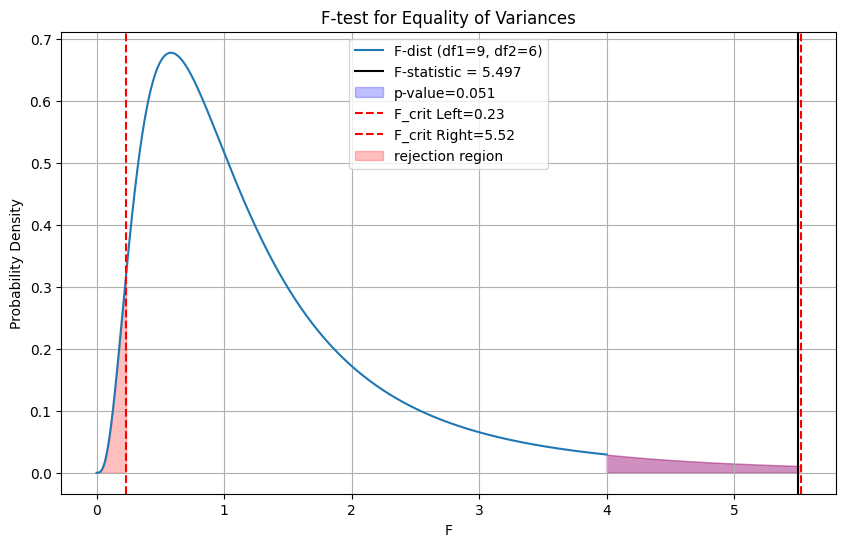

Assuming equal variances


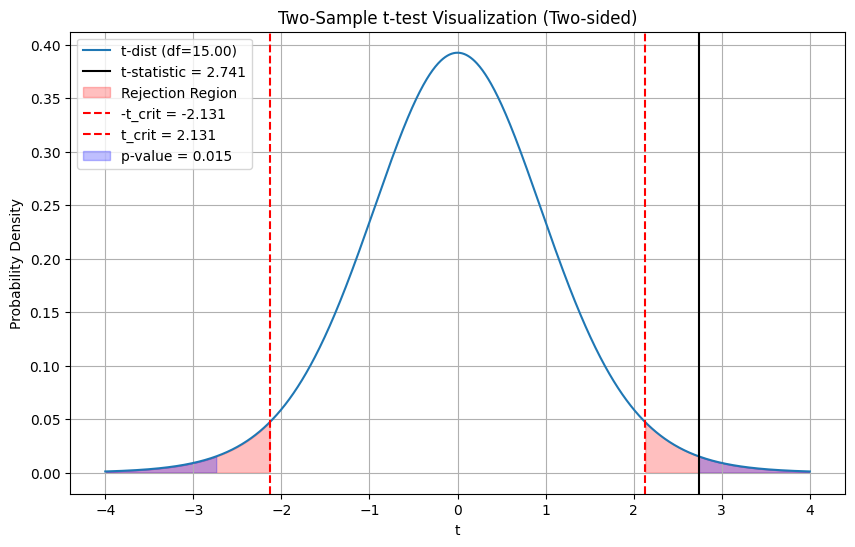

In [10]:
visualize_two_sample_t_test(
    n1=7, x_bar1=1427.6, s1=142.5,
    n2=10, x_bar2=1057.5, s2=334.1,
    alpha=0.05, alternative='two-sided'
)

